In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

In [146]:
data = pd.read_csv('weather_data_test_new.csv')
data.head()

,temp,feelslike,humidity,dew,precip,precipprob,snow,snowdepth,preciptype,windgust,windspeed,winddir,pressure,visibility,cloudcover,uvindex,severerisk,conditions
0,24.6,24.6,71.98,19.2,0.0,0,0,0,NaN,7.6,9.1,20.0,1009.5,10.9,80.0,0,10,Partially cloudy
1,24.0,24.0,73.63,19.0,0.0,0,0,0,NaN,9.4,8.6,24.0,1009.0,10.0,70.9,0,10,Partially cloudy
2,23.0,23.0,78.21,19.0,0.0,0,0,0,NaN,8.3,7.6,12.0,1009.0,10.0,27.0,0,10,Partially cloudy
3,23.0,23.0,78.76,19.1,0.0,0,0,0,NaN,8.3,6.1,4.0,1009.0,10.9,88.0,0,10,Partially cloudy
4,23.0,23.0,78.21,19.0,0.0,0,0,0,NaN,10.4,5.4,18.0,1009.4,10.0,72.5,0,10,Partially cloudy


In [147]:
data.shape

(407, 18)

In [148]:
data = data.drop(columns=["preciptype", "snowdepth", "snow", "precipprob"])

In [149]:
data.shape

(407, 14)

In [150]:
data.columns

Index(['temp', 'feelslike', 'humidity', 'dew', 'precip', 'windgust',
       'windspeed', 'winddir', 'pressure', 'visibility', 'cloudcover',
       'uvindex', 'severerisk', 'conditions'],
      dtype='object')

In [151]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        407 non-null    float64
 1   feelslike   407 non-null    float64
 2   humidity    407 non-null    float64
 3   dew         407 non-null    float64
 4   precip      407 non-null    float64
 5   windgust    407 non-null    float64
 6   windspeed   407 non-null    float64
 7   winddir     407 non-null    float64
 8   pressure    407 non-null    float64
 9   visibility  407 non-null    float64
 10  cloudcover  407 non-null    float64
 11  uvindex     407 non-null    int64  
 12  severerisk  407 non-null    int64  
 13  conditions  407 non-null    object 
dtypes: float64(11), int64(2), object(1)
memory usage: 44.6+ KB


In [152]:
data.describe()

,temp,feelslike,humidity,dew,precip,windgust,windspeed,winddir,pressure,visibility,cloudcover,uvindex,severerisk
count,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000,407.000000
mean,27.093366,28.559951,70.580074,21.060442,0.133415,13.282801,8.779361,165.528010,1010.503440,9.752088,68.617690,1.776413,9.574939
std,2.763508,4.146688,11.393685,1.905588,1.190651,8.421489,3.820139,134.903614,1.647879,1.391030,27.539452,2.569552,2.326472
min,20.000000,20.000000,46.170000,17.000000,0.000000,1.800000,0.000000,0.000000,1007.000000,1.400000,0.000000,0.000000,3.000000
25%,25.000000,25.000000,61.640000,19.400000,0.000000,7.200000,5.950000,30.000000,1009.000000,10.000000,50.000000,0.000000,10.000000
50%,27.000000,28.800000,69.740000,21.000000,0.000000,10.400000,8.300000,142.800000,1010.500000,10.000000,80.000000,0.000000,10.000000
75%,29.400000,32.150000,78.640000,22.600000,0.000000,17.800000,11.000000,305.000000,1011.600000,10.000000,90.000000,3.000000,10.000000
max,32.600000,37.200000,99.380000,25.500000,19.000000,41.400000,22.200000,360.000000,1015.000000,10.900000,100.000000,8.000000,30.000000


In [153]:
data.isnull().sum()

temp          0
feelslike     0
humidity      0
dew           0
precip        0
windgust      0
windspeed     0
winddir       0
pressure      0
visibility    0
cloudcover    0
uvindex       0
severerisk    0
conditions    0
dtype: int64

In [154]:
# Adjust classification criteria to reduce imbalance and create a new column for air quality
def classify_air_quality_adjusted(row):
    # Adjusted criteria: Broaden the "Tốt" conditions
    if (row['humidity'] < 80 and row['uvindex'] < 5 and
        row['conditions'] in ['Clear', 'Partially cloudy', 'Overcast']):
        return "Tốt"
    else:       
        return "Kém"

In [155]:
# Apply the adjusted criteria
data['air_quality_adjusted'] = data.apply(classify_air_quality_adjusted, axis=1)
# Check the distribution of the adjusted classification
adjusted_counts = data['air_quality_adjusted'].value_counts()
adjusted_counts

air_quality_adjusted
Tốt    223
Kém    184
Name: count, dtype: int64

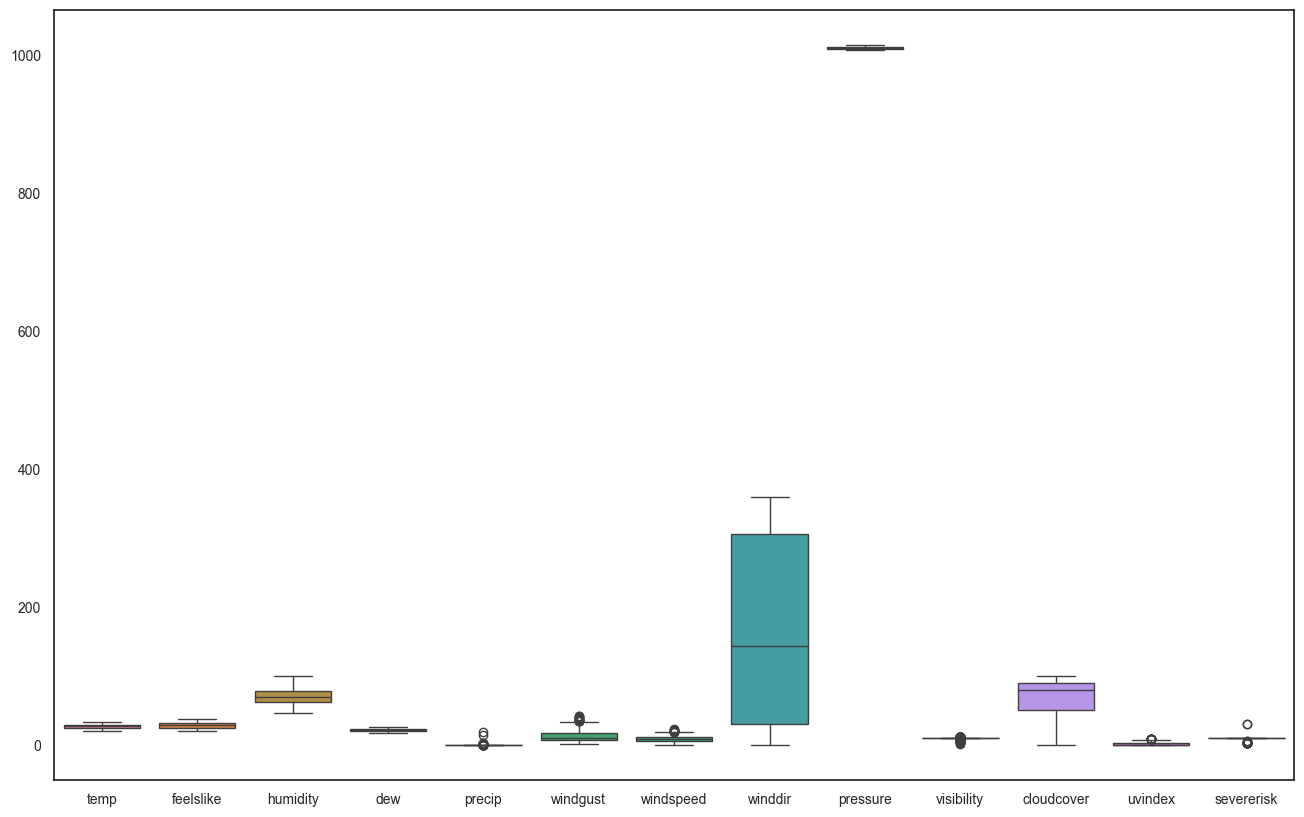

In [156]:
plt.figure(figsize=(16,10))
sns.boxplot(data=data)
plt.show()

In [157]:
data.select_dtypes(include="object").columns

Index(['conditions', 'air_quality_adjusted'], dtype='object')

In [158]:
categorical_cols = ["conditions", "air_quality_adjusted"]
encode = OrdinalEncoder()
data[categorical_cols] = encode.fit_transform(data[categorical_cols])

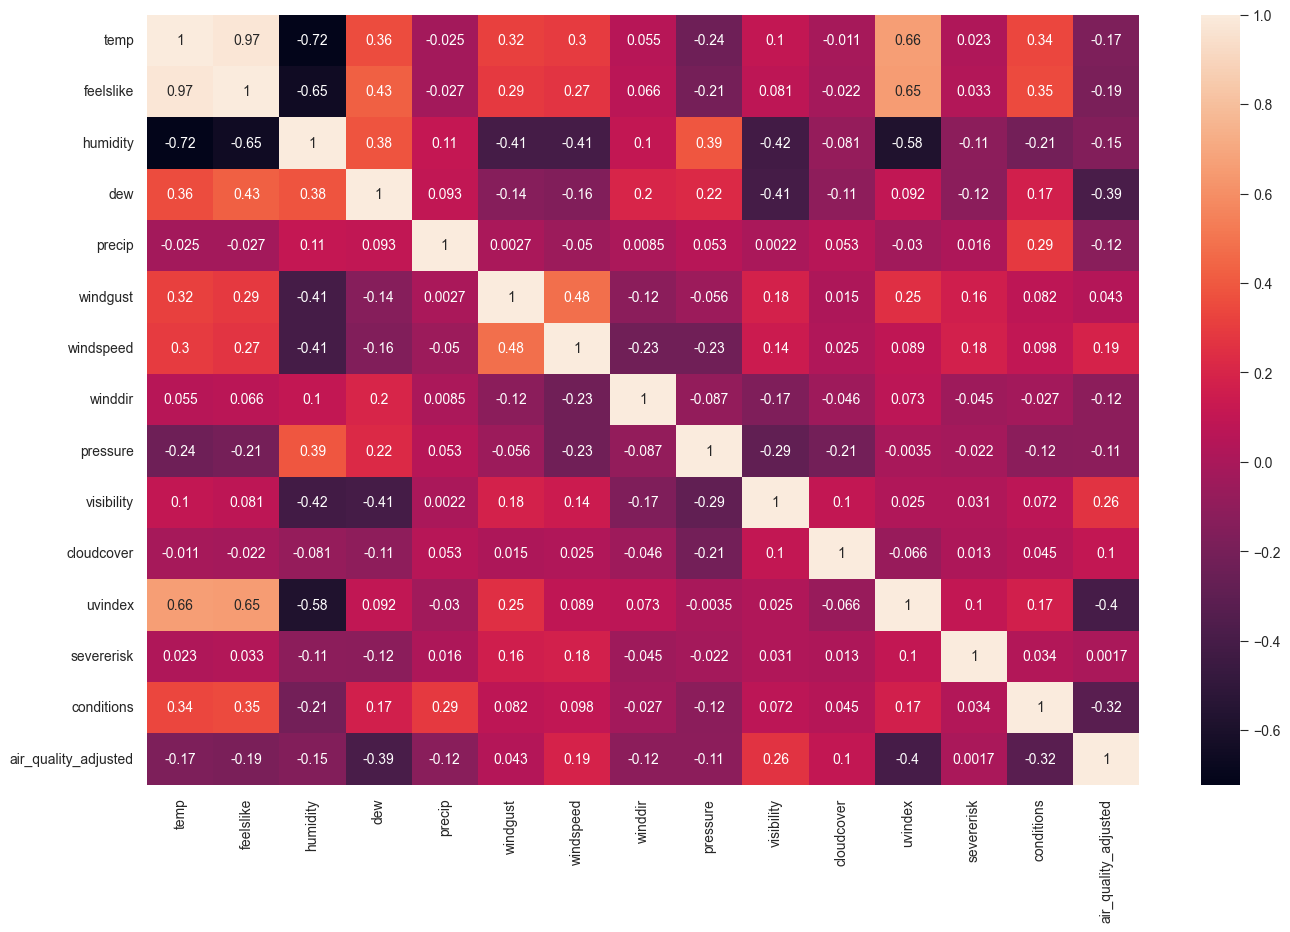

In [159]:
plt.figure(figsize=(16,10))
sns.heatmap(data=data.corr(), annot=True)
plt.show()

In [1]:
# for col in data.columns:
#     if col != 'target':
#         sns.displot(data, x=col, hue='air_quality_adjusted', kind='kde', fill=True)
#         plt.title(f'Biểu đồ phân phối của {col} phụ thuộc vào biến target')
#         plt.show()

# columns_to_plot = [col for col in data.columns if col != 'target']
#
# # Tính toán số hàng và cột phù hợp
# num_columns = len(columns_to_plot)
# num_rows = math.ceil(num_columns / 3)  # 3 cột trên mỗi hàng
#
# fig, axes = plt.subplots(num_rows, 3, figsize=(16, 12))
# axes = axes.flatten()
#
# for i, col in enumerate(columns_to_plot):
#     sns.histplot(data=data, x=col, hue='air_quality_adjusted', ax=axes[i])
#     axes[i].set_title(f'Histogram of {col} by air_quality_adjusted')
#     axes[i].set_xlabel(col)
#     axes[i].set_ylabel('Count')
#
# # Ẩn các ô dư thừa
# for j in range(len(columns_to_plot), len(axes)):
#     fig.delaxes(axes[j])
#
# plt.tight_layout()
# plt.show()

columns = ['temp', 'feelslike', 'humidity', 'dew', 'precip', 'windgust',
       'windspeed', 'winddir', 'pressure', 'visibility', 'cloudcover',
       'uvindex', 'severerisk', 'conditions']

ncols = 3
nrows = math.ceil(len(columns) / ncols)

# Tạo grid các subplot
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, nrows * 5))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.histplot(data=data, x=col, ax=axes[i], bins=30, kde=False)
    axes[i].set_title(f"Histogram of {col}")
    axes[i].tick_params(axis='x', rotation=45)

# Ẩn các subplot không sử dụng
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

NameError: name 'math' is not defined

In [161]:
x = data.drop(columns="air_quality_adjusted")
y = data['air_quality_adjusted']

In [162]:
scaler = RobustScaler()

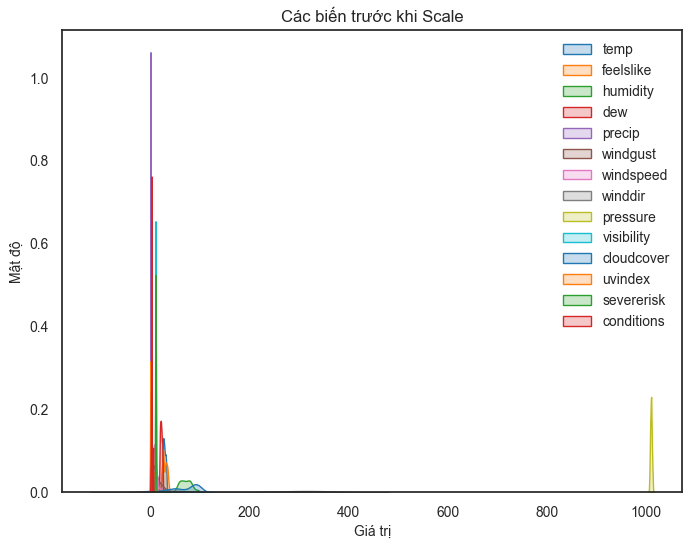

In [163]:
columns_to_plot = [col for col in data.columns if col != 'air_quality_adjusted']
plt.figure(figsize=(8, 6))
for col in columns_to_plot:
    sns.kdeplot(data=data[col], label=col, fill=True)

plt.legend(loc='upper right')
plt.title("Phân phối các biến trước khi scale")
plt.xlabel("Giá trị")
plt.ylabel("Mật độ")
plt.show()

In [164]:
X_scaled = scaler.fit_transform(x)
X_scaled = pd.DataFrame(X_scaled, columns=data.columns[0:-1])
X_scaled

,temp,feelslike,humidity,dew,precip,windgust,windspeed,winddir,pressure,visibility,cloudcover,uvindex,severerisk,conditions
0,-0.545455,-0.587413,0.131765,-0.56250,0.0,-0.264151,0.158416,-0.446545,-0.384615,0.9,0.0000,0.0,0.0,0.0
1,-0.681818,-0.671329,0.228824,-0.62500,0.0,-0.094340,0.059406,-0.432000,-0.576923,0.0,-0.2275,0.0,0.0,0.0
2,-0.909091,-0.811189,0.498235,-0.62500,0.0,-0.198113,-0.138614,-0.475636,-0.576923,0.0,-1.3250,0.0,0.0,0.0
3,-0.909091,-0.811189,0.530588,-0.59375,0.0,-0.198113,-0.435644,-0.504727,-0.576923,0.9,0.2000,0.0,0.0,0.0
4,-0.909091,-0.811189,0.498235,-0.62500,0.0,0.000000,-0.574257,-0.453818,-0.423077,0.0,-0.1875,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.227273,0.055944,-0.684706,-0.62500,0.0,0.613208,-0.574257,0.535273,-0.192308,0.0,0.4975,0.0,0.0,-1.0
403,0.227273,0.055944,-0.684706,-0.62500,0.0,0.952830,0.217822,0.644364,0.192308,0.0,-0.1100,0.0,0.0,0.0
404,0.227273,0.055944,-0.684706,-0.62500,0.1,0.783019,0.217822,0.789818,0.576923,0.0,-0.5650,0.0,0.0,3.0
405,0.000000,0.041958,0.258235,0.31250,0.0,0.716981,0.574257,-0.082909,0.576923,0.0,-1.3750,0.0,0.0,0.0


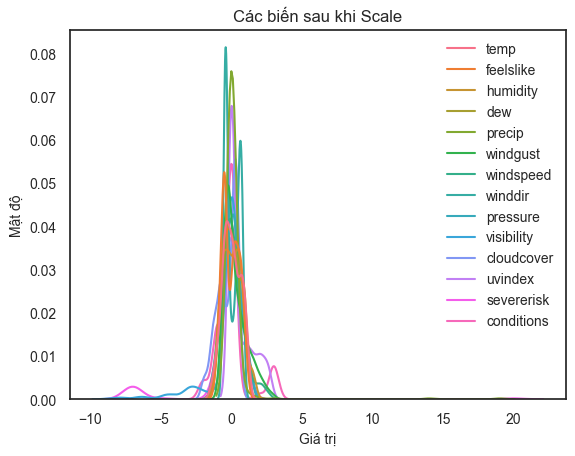

In [165]:
sns.kdeplot(data=X_scaled)
plt.title("Phân phối các biến sau khi scale")
plt.xlabel("Giá trị")
plt.ylabel("Mật độ")
plt.show()

In [166]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [167]:
# Ti le phuong sai
expalained_var = pca.explained_variance_ratio_ # khoan tin cay
print(f'Ty le phuong sai giai thich {expalained_var}')

Ty le phuong sai giai thich [3.75726590e-01 1.63097976e-01 1.24868399e-01 1.03921096e-01
 5.62514973e-02 4.76586893e-02 3.53047959e-02 2.62222952e-02
 2.45927203e-02 1.94226792e-02 1.25603609e-02 9.72887084e-03
 5.77272729e-04 6.67575565e-05]


In [168]:
# chon tren phuong sai tich luy
cumsum_explained_var = np.cumsum(pca.explained_variance_ratio_)
print(f'Phuong sai tich luy: {cumsum_explained_var}')

Phuong sai tich luy: [0.37572659 0.53882457 0.66369296 0.76761406 0.82386556 0.87152425
 0.90682904 0.93305134 0.95764406 0.97706674 0.9896271  0.99935597
 0.99993324 1.        ]


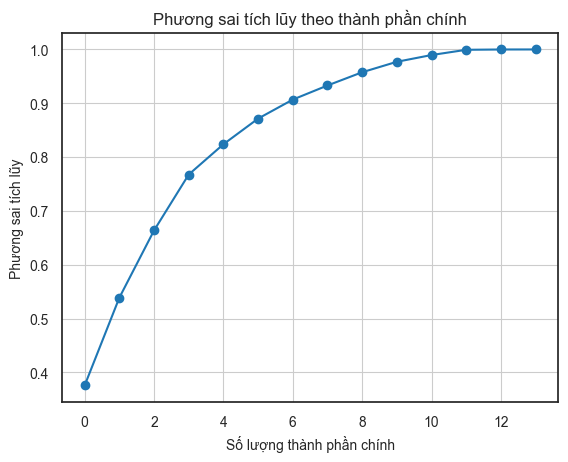

In [169]:
# Vẽ biểu đồ phương sai tích lũy
plt.style.use('seaborn-v0_8-ticks')
plt.plot(cumsum_explained_var, marker='o')
plt.xlabel('Số lượng thành phần chính')
plt.ylabel('Phương sai tích lũy')
plt.title('Phương sai tích lũy theo thành phần chính')
plt.grid();

In [170]:
# Lua chon thanh phan chinh ty le > 0.9
n_components = np.argmax(cumsum_explained_var >=0.9) + 1
print(f'So luong thanh phan chinh duoc chon : {n_components}')

So luong thanh phan chinh duoc chon : 7


In [171]:
pca = PCA(n_components=n_components)
X_pca_reduced = pca.fit_transform(X_scaled)
X_pca_reduced

array([[ 0.41553393,  0.53139938, -1.05302833, ...,  0.58831138,
         0.21891463,  0.26068751],
       [ 0.37104361, -0.18163661, -0.76051449, ...,  0.49578297,
         0.46545048,  0.251651  ],
       [ 0.32070716, -0.45688105, -0.8364955 , ...,  0.59014874,
         0.20172041, -0.63297182],
       ...,
       [ 0.59206177,  1.18042091,  1.5690758 , ...,  1.78937489,
         0.97509761, -0.82507019],
       [ 0.43438809, -0.05176652, -0.19800742, ..., -0.08578315,
         0.43528775, -1.37500841],
       [ 0.33357439, -1.03538799,  0.31638571, ...,  0.03588582,
         0.64214556, -0.76434372]], shape=(407, 7))

In [172]:
from statsmodels.api import Logit
import statsmodels.api as sm

In [173]:
X = X_pca_reduced
X = sm.add_constant(X)
model = Logit(y, X).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.428295
         Iterations 9
                            Logit Regression Results                            
Dep. Variable:     air_quality_adjusted   No. Observations:                  407
Model:                            Logit   Df Residuals:                      399
Method:                             MLE   Df Model:                            7
Date:                  Tue, 07 Jan 2025   Pseudo R-squ.:                  0.3780
Time:                          20:46:56   Log-Likelihood:                -174.32
converged:                         True   LL-Null:                       -280.24
Covariance Type:              nonrobust   LLR p-value:                 3.541e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4780      0.314     -4.709      0.000      -2.093      -0.863
x1           

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X_pca_reduced, y, test_size=0.2, random_state=42)

# Huan luyen mo hinh
model = LogisticRegression()
model.fit(X_train, y_train)

# Intercept va Cofficient
intercept = model.intercept_
cofficient = model.coef_
print(f' He so chan Intercept: {intercept}')
print(f' He so hoi quy ung voi tung dac trung Cofficients: {cofficient}')

# Du doan tren tap Test
y_pred = model.predict(X_test)

# Danh gia mo hinh
print('Accuracy: ',accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

 He so chan Intercept: [-0.10700385]
 He so hoi quy ung voi tung dac trung Cofficients: [[-0.05966694  0.0594603  -2.53772548 -1.41306207  1.05959538  1.22623186
   0.06626928]]
Accuracy:  0.7682926829268293
Classification Report:
               precision    recall  f1-score   support

         0.0       0.79      0.64      0.71        36
         1.0       0.75      0.87      0.81        46

    accuracy                           0.77        82
   macro avg       0.77      0.75      0.76        82
weighted avg       0.77      0.77      0.76        82



Text(47.25, 0.5, 'Thực tế')

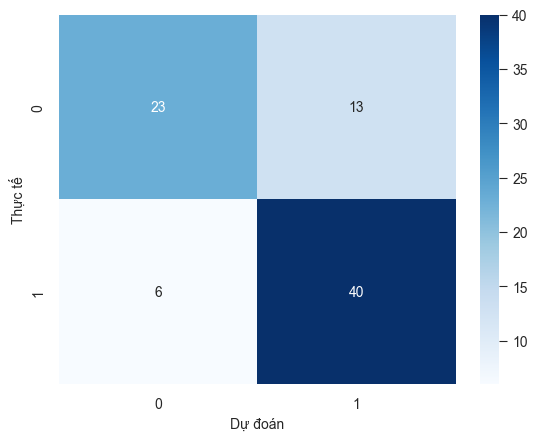

In [175]:
sns.heatmap(confusion_matrix(y_test, y_pred), cmap='Blues', annot=True)
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')